# 🧠 AI-Powered Predictive System for Heart Failure Detection

## Executive Summary

This project focuses on designing and deploying an AI-powered predictive system to assist in the early detection of heart failure using clinical data. Leveraging machine learning algorithms, the system analyzes patient health indicators to predict the likelihood of heart failure-related mortality.

The primary goal is to build a robust, accurate predictive model and integrate it into a user-friendly web application using Flask. This will enable healthcare professionals or users to input clinical data and receive real-time risk predictions, supporting timely medical decision-making.

Key tools and techniques utilized include Python programming, data preprocessing with Pandas and NumPy, exploratory data analysis with Matplotlib and Seaborn, model building using Scikit-learn (e.g., Logistic Regression, Random Forest), and deployment of the predictive model via a Flask web interface. Model evaluation metrics such as accuracy, precision, recall, and ROC-AUC guided the selection of the best-performing model.


## Introduction

Heart failure is a leading cause of morbidity and mortality worldwide, significantly impacting patients’ quality of life and healthcare systems. Early detection and timely intervention are crucial to improving patient outcomes and reducing medical costs. However, traditional diagnostic methods often rely on subjective assessments and may delay critical care.

Artificial Intelligence (AI) and Machine Learning (ML) offer promising solutions by enabling automated analysis of complex clinical data to identify patterns that may be missed by human experts. This project harnesses AI to develop a predictive model that analyzes clinical parameters and predicts the risk of heart failure-related death. By deploying this model through a simple web interface, the system aims to assist healthcare professionals in making informed decisions swiftly and efficiently.

## Problem Statement

Heart failure diagnosis and prognosis remain challenging due to the complex interplay of multiple clinical factors. There is a need for accessible, accurate, and interpretable tools that can support clinicians in early risk stratification and patient monitoring.

This project addresses the question: *How can AI models be developed and deployed in real-world clinical settings to predict heart failure outcomes effectively, and how can these predictions be made easily accessible through a web application?* The goal is to build a reliable machine learning model and integrate it into a Flask-based web app for real-time, user-friendly predictions.

**Import necessary libraries**


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline

**Loading up my data**

In [6]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['RestingBP'].plot(kind='hist', bins=20, title='RestingBP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Cholesterol'].plot(kind='hist', bins=20, title='Cholesterol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MaxHR'].plot(kind='hist', bins=20, title='MaxHR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('ChestPainType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('RestingECG').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('ExerciseAngina').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Age', y='RestingBP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='RestingBP', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Cholesterol', y='MaxHR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='MaxHR', y='Oldpeak', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FastingBS']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('FastingBS', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FastingBS')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FastingBS']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('FastingBS', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ChestPainType')):
  _plot_series(series, series_name, i)
  fig.legend(title='ChestPainType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FastingBS')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FastingBS']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('FastingBS', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('RestingECG')):
  _plot_series(series, series_name, i)
  fig.legend(title='RestingECG', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FastingBS')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FastingBS']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('FastingBS', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ExerciseAngina')):
  _plot_series(series, series_name, i)
  fig.legend(title='ExerciseAngina', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FastingBS')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
_df_16['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['RestingBP'].plot(kind='line', figsize=(8, 4), title='RestingBP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Cholesterol'].plot(kind='line', figsize=(8, 4), title='Cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['MaxHR'].plot(kind='line', figsize=(8, 4), title='MaxHR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ChestPainType'].value_counts()
    for x_label, grp in _df_20.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('ChestPainType')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RestingECG'].value_counts()
    for x_label, grp in _df_21.groupby('ChestPainType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ChestPainType')
_ = plt.ylabel('RestingECG')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ExerciseAngina'].value_counts()
    for x_label, grp in _df_22.groupby('RestingECG')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RestingECG')
_ = plt.ylabel('ExerciseAngina')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ST_Slope'].value_counts()
    for x_label, grp in _df_23.groupby('ExerciseAngina')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ExerciseAngina')
_ = plt.ylabel('ST_Slope')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Age', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['ChestPainType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Age', y='ChestPainType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['RestingECG'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Age', y='RestingECG', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['ExerciseAngina'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Age', y='ExerciseAngina', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [53]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


 My Dataset is clean and clear and there are no missing data.

---



**Exploratory Data Anaysis**

In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


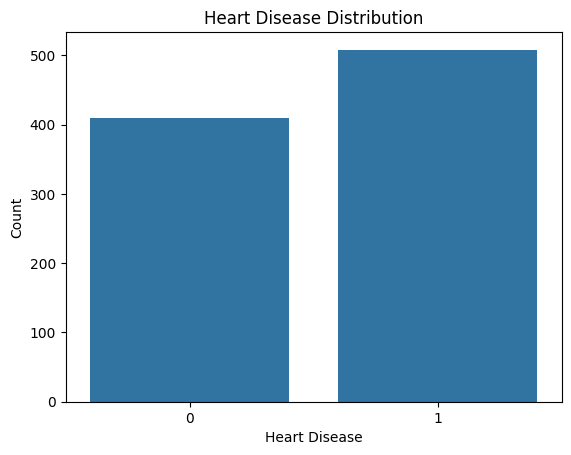

In [19]:
sns.countplot(x='HeartDisease',data=data)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Heart Disease Distribution')
plt.show()

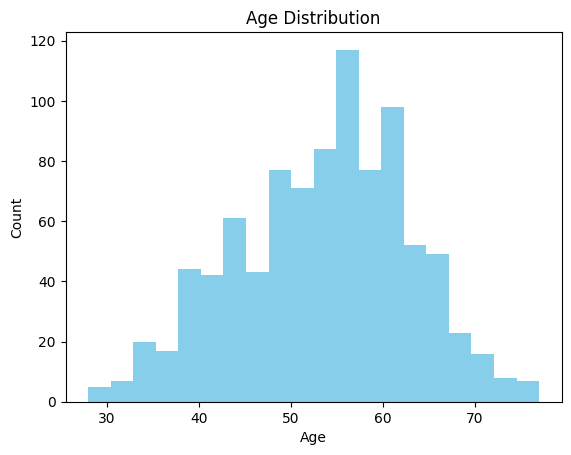

In [22]:
# 4. Histogram of age distribution
plt.hist(data['Age'], bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

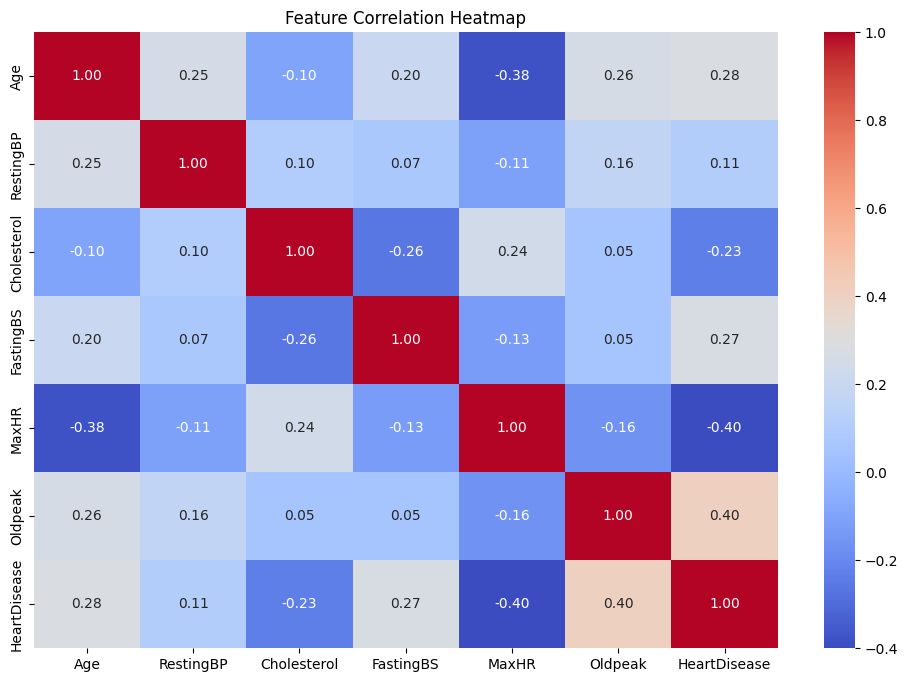

In [26]:
# 6. Correlation heatmap of all numerical features
plt.figure(figsize=(12,8))
# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

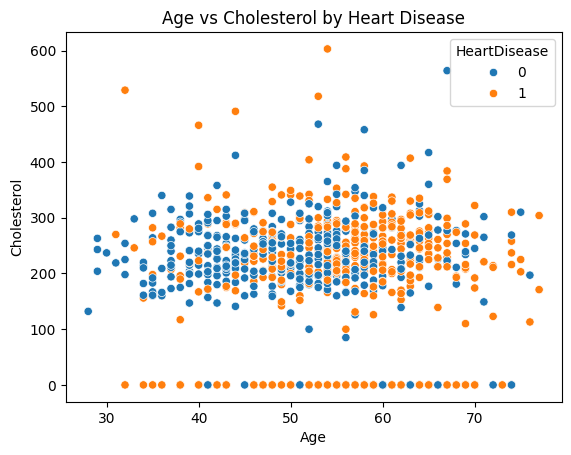

In [29]:
# 8. Scatter plot of age vs Cholesterol colored by HeartDisease
sns.scatterplot(x='Age', y='Cholesterol', hue='HeartDisease', data=data)
plt.title('Age vs Cholesterol by Heart Disease')
plt.show()

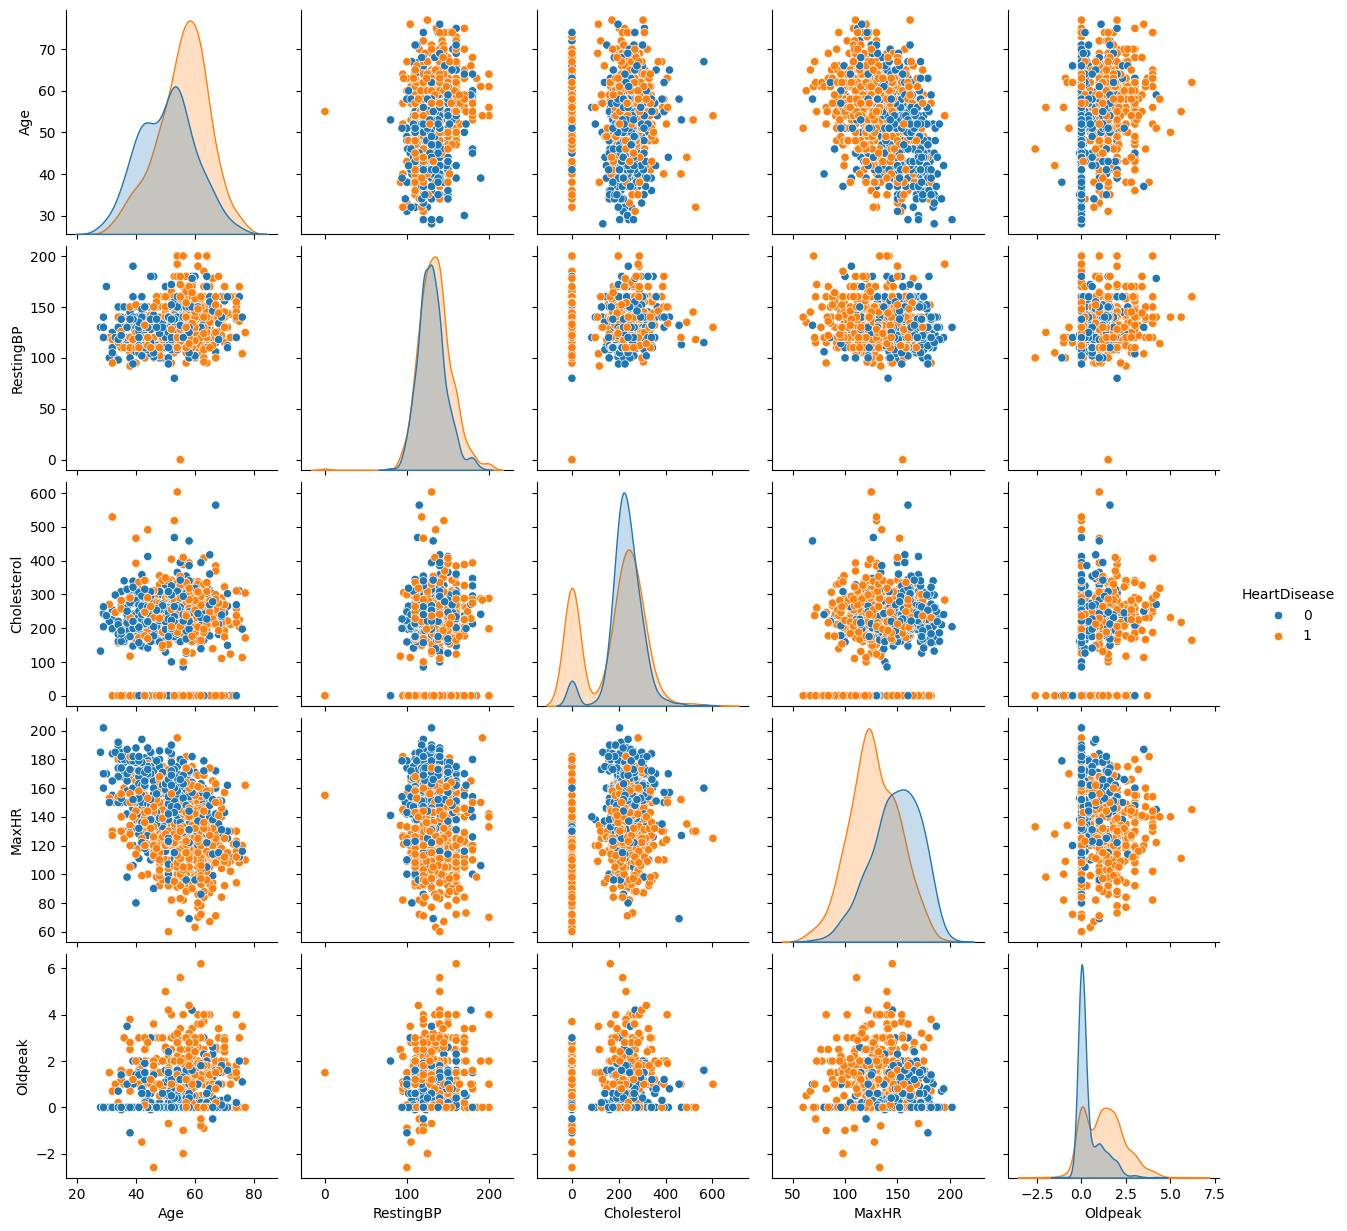

In [31]:
# 9. Pairplot for selected features to observe pairwise relationships
sns.pairplot(data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue='HeartDisease')
plt.show()

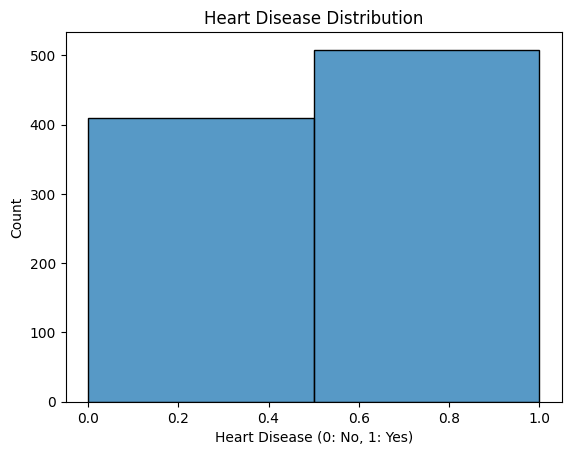

In [33]:
# Distribution plot of HeartDisease
sns.histplot(data=data, x='HeartDisease', bins=2) # Bins=2 for binary data
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

**Preprocessing - Encoding + Scal**ing

In [42]:
# Defining  features and labels
x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

#categories and numerical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

#preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

**Train - Test - Split**

In [43]:
#splitting my data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

**Training Random Forest Model**



In [46]:
#Building pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

#Training the model
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

**Evaluation**

In [48]:
#prediction
y_pred_rf = rf_pipeline.predict(x_test)

#evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print('Accuracy score: ', accuracy_rf)
print('Precision of rf: ', precision_rf)
print('recall rf: ', recall_rf)

Accuracy score:  0.9021739130434783
Precision of rf:  0.8962264150943396
recall rf:  0.9313725490196079


**Training Logistic Regression Model**

In [49]:
#Building logistic regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

#Training the model
lr_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak'])])),
                ('classifier', LogisticRegression(random_state=42))])

Evaluating logistic regression pipeline

In [50]:
#prediction
y_pred_lr = lr_pipeline.predict(x_test)

#evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print('Accuracy score: ', accuracy_lr)
print('Precision of lr: ', precision_lr)
print('recall lr: ', recall_lr)

Accuracy score:  0.8858695652173914
Precision of lr:  0.8715596330275229
recall lr:  0.9313725490196079


*After trainig 2 models, random forest performance proved to be higher and I would like to use random forest for my project.*

**Saving the best model**

In [51]:
#saving rf model
import joblib
joblib.dump(rf_pipeline, 'heart_failure_rf_model.pkl')

['heart_failure_rf_model.pkl']

**Sample prediction**

In [63]:
#Load model
import joblib
model = joblib.load('heart_failure_rf_model.pkl')

#example input
Patient_data={'Age': 39,
                'Sex':'M',
                'ChestPainType': 'ATA',
                'RestingBP': 120,
                'Cholesterol':204,
                'FastingBS': 0,
                'RestingECG': 'Normal',
                'MaxHR': 145,
                'ExerciseAngina': 'N',
                'Oldpeak': 0,
                'ST_Slope': 'Up'}

#convert to data frame before prediction
data_input= pd.DataFrame([Patient_data])
prediction = model.predict(data_input)

if prediction == 1:
    print('Prediction: You are suffering from heart disease. Please consult a doctor ASAP.')
else:
    print('Prediction: You are safe from heart disease based on the current data.')

Prediction: You are safe from heart disease based on the current data.
